In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to lomissing = df.isnull().sum().sort_values(ascending=False)ad

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-prices-in-european-cities/paris_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/rome_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/berlin_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/amsterdam_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/lisbon_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/amsterdam_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/rome_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/athens_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/budapest_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/barcelona_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/barcelona_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/budapest_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/vienna_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/london_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/berl

In [11]:
df = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/amsterdam_weekdays.csv")
df.head()


,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [13]:
# Tüm sütunlardaki eksik değerleri say ve azalan şekilde sırala
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]  # Sadece eksik olanları göster
print(missing)

Series([], dtype: int64)


In [14]:
from sklearn.model_selection import train_test_split

In [19]:
X = df[["metro_dist", "bedrooms", "cleanliness_rating", "room_private"from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
]]  # Dummy sütunları da ekle
y = df["realSum"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2: 0.454302641060339
MSE: 53178.417351566306


In [22]:
importance = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(importance.sort_values(by='Coefficient', ascending=False))


                    Coefficient
bedrooms             228.723690
cleanliness_rating    20.373896
metro_dist           -63.988213
room_private        -233.682070


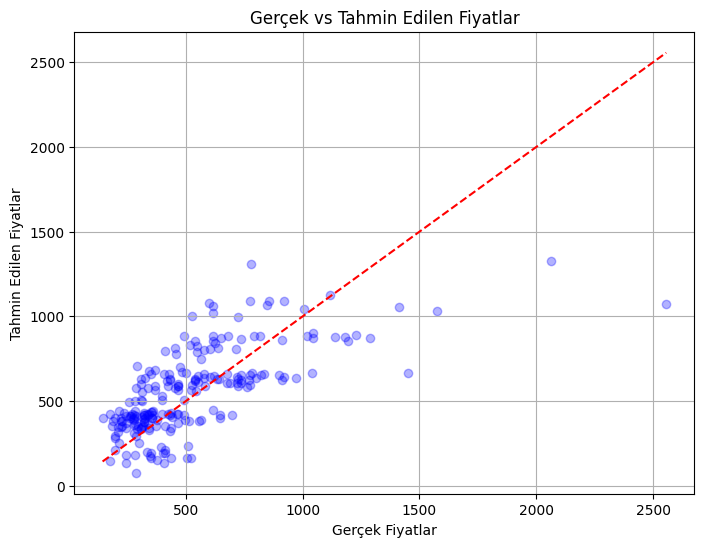

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # 45° referans çizgisi
plt.xlabel("Gerçek Fiyatlar")
plt.ylabel("Tahmin Edilen Fiyatlar")
plt.title("Gerçek vs Tahmin Edilen Fiyatlar")
plt.grid(True)
plt.show()

#🔴 Kırmızı çizgi: Tahmin = Gerçek olması gereken ideal çizgi

#🔵 Mavi noktalar: Modelin tahmin ettiği değerler

In [31]:
df.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')

In [38]:
# 1. Tahmin yapmak istediğin yeni veri
new_data = pd.DataFrame([{
    'person_capacity': 4,
    'bedrooms': 2,
    'metro_dist': 0.50,
    'room_private': 'No'  
}])

# 2. Kategorik veriyi dönüştür
new_data['room_private'] = new_data['room_private'].map({'Yes': 1, 'No': 0})

# 3. Fazla sütunları sil (modelde yoksa çıkar)
new_data = new_data[[col for col in new_data.columns if col in X.columns]]
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Skoru: {r2:.3f}")

# 4. Eksik sütunları ekle (modelde vardı ama burada yoksa 0 ile tamamla)
for col in X.columns:
    if col not in new_data.columns:
        new_data[col] = 0

# 5. Sıralamayı eşitle
new_data = new_data[X.columns]

# 6. Tahmin yap
predicted_price = model.predict(new_data)
print(f"Tahmin edilen fiyat: ${predicted_price[0]:.2f}")


Tahmin edilen fiyat: $678.75


In [39]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Skoru: {r2:.3f}")


R² Skoru: 0.454


In [40]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Skoru: {r2:.3f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


R² Skoru: 0.454
MSE: 53178.42
RMSE: 230.60
MAE: 172.86
